<h1>Model: Model 2 from Emotion Project</h1>

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages

In [5]:
import keras
import pandas as pd
import tensorflow as tf

import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input,AveragePooling2D, BatchNormalization, LeakyReLU

# from keras.applications import MobileNet
# from keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

from collections import defaultdict
from PIL import Image

Using TensorFlow backend.


<h2>Data Loading and Preparation</h2>

In [6]:
def getSpeciesCode(x):
    part = x.split('_')
    if part[0] == 'ASETRI':
        return 0
    elif part[0] == 'EPTBOT':
        return 1
    elif part[0] == 'MYOEMA':
        return 2
    elif part[0] == 'PIPKUH':
        return 3
    elif part[0] == 'RHIMUS':
        return 4
    elif part[0] == 'RHYNAS':
        return 5
    elif part[0] == 'ROUAEG':
        return 6
    elif part[0] == 'TAPPER':
        return 7
    else:
        return 'Unknown'
    
def getSpecies(x):
    if x == 0:
        return 'ASETRI'
    elif x == 1:
        return 'EPTBOT'
    elif x == 2:
        return 'MYOEMA'
    elif x == 3:
        return 'PIPKUH'
    elif x == 4:
        return 'RHIMUS'
    elif x == 5:
        return 'RHYNAS'
    elif x == 6:
        return 'ROUAEG'
    elif x == 7:
        return 'TAPPER'
    else:
        return 'Unknown'

In [7]:
image_folder_path = 'data/SpectogramInitial'
file_paths = [f for f in os.listdir(image_folder_path)]
species = []
for file_name in file_paths:
    sp = file_name.split('_')
    species.append(sp[0])

df = pd.DataFrame(species, columns=['Species'])
df['Species'].value_counts()

RHIMUS    1799
TAPPER     429
PIPKUH     303
RHYNAS     271
EPTBOT     131
ROUAEG     121
MYOEMA     114
ASETRI      25
Name: Species, dtype: int64

[array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8), array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],

TypeError: Invalid shape (224, 341, 1) for image data

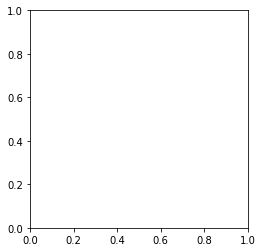

In [24]:
X_all = []
Y_all = []

image_folder_path = 'data/SpectogramInitial'
file_paths = [f for f in os.listdir(image_folder_path)]

for file_name in file_paths:
    spectrogram = Image.open(image_folder_path + '/' + file_name)
    spectrogram = spectrogram.convert('L') # to 'L'-> grey scale
    spectrogram = spectrogram.resize((341, 224))  # 195,125
    spectrogram = np.array(spectrogram)
    spectrogram = np.expand_dims(spectrogram, axis=2) #-> to expand the dimensions accross the Z axis- for 2d CNN
    X_all.append(spectrogram)
    Y_all.append(getSpeciesCode(file_name))
    
print(X_all)
print(Y_all)
plt.imshow(X_all[0])


In [25]:
X_all = np.array(X_all)
Y_all = np.array(Y_all)

print(X_all.shape)
print(Y_all.shape)

X_all = X_all.astype('float32')
X_all /= 255

Y_all = np_utils.to_categorical(Y_all, num_classes=8)

print(X_all)
print(Y_all)

(3193, 224, 341, 1)
(3193,)
[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [

In [26]:
# train /test= 80/20% split
# Data is stratified
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state = 123, stratify=Y_all)



<h2>Model Building</h2>

In [27]:
def build_current_model():
    inp = Input(shape=(224,341,1))
    
    c1 = Convolution2D(filters=128,kernel_size=(5,5),strides=(2,2),padding='same')(inp)
    bt = BatchNormalization()(c1)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = MaxPooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.2)(mpool)

    
    c2 = Convolution2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='same')(mpool)
    bt = BatchNormalization()(c2)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.3)(mpool)
    
    c2 = Convolution2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(mpool)
    bt = BatchNormalization()(c2)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.3)(mpool)
    
    c3 = Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(mpool)
    bt = BatchNormalization()(c3)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.4)(mpool)
    
    f = Flatten()(mpool)
    
    x_dense = Dense(2048)(f)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.4)(bt)

    
    x_dense = Dense(2048)(bt)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.3)(bt)
    
    x_dense = Dense(512)(bt)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.2)(bt)

    x_out = Dense(8, name='output', activation='softmax')(bt)
    
    model = Model(inputs=inp, outputs=x_out)
    model.compile(optimizer=Adam(lr=0.002), 
                  loss='categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model


In [28]:
model = build_current_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 341, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 171, 128)     3328      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 171, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 112, 171, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 86, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 86, 128)       0         
_________

In [ ]:
#tf.keras.utils.plot_model(model, "Model-.png", show_shapes=True)

In [29]:
history = model.fit(X_train, Y_train, 
              epochs = 100, 
              validation_split=0.1, 
              verbose=1, 
              batch_size = 32)

history_info = history.history

Train on 2298 samples, validate on 256 samples
Epoch 1/100
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.4749 - acc: 0.5596 - val_loss: 3.8316 - val_acc: 0.0898
Epoch 2/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 1.1580 - acc: 0.6084 - val_loss: 2.4200 - val_acc: 0.5703
Epoch 3/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 1.0900 - acc: 0.6366 - val_loss: 1.8690 - val_acc: 0.5703
Epoch 4/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 1.0600 - acc: 0.6388 - val_loss: 1.7371 - val_acc: 0.5820
Epoch 5/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.9860 - acc: 0.6614 - val_loss: 1.5795 - val_acc: 0.5742
Epoch 6/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 1.0054 - acc: 0.6475 - val_loss: 1.1994 - val_acc: 0.6680
Epoch 7/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.9234 - acc: 0.6802 - val_loss: 0.9229 - val_acc: 0

2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0529 - acc: 0.9830 - val_loss: 0.4254 - val_acc: 0.9023
Epoch 61/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0706 - acc: 0.9782 - val_loss: 0.3349 - val_acc: 0.9219
Epoch 62/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0744 - acc: 0.9743 - val_loss: 0.3871 - val_acc: 0.9414
Epoch 63/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0453 - acc: 0.9839 - val_loss: 0.3697 - val_acc: 0.9570
Epoch 64/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0615 - acc: 0.9809 - val_loss: 0.3031 - val_acc: 0.9219
Epoch 65/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0502 - acc: 0.9817 - val_loss: 0.2720 - val_acc: 0.9414
Epoch 66/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 0.0479 - acc: 0.9865 - val_loss: 0.3017 - val_acc: 0.9180
Epoch 67/100
2298/2298 [=======================

<h2>Evaluation (Basic)</h2>

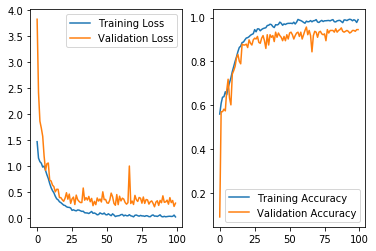

In [30]:
## Loss and accuracy history
_, axs = plt.subplots(ncols=2)
df_history_info = pd.DataFrame(history_info) 


sns.lineplot(data=df_history_info['loss'],ax=axs[0], label='Training Loss', legend='brief')
sns.lineplot(data=df_history_info['val_loss'],ax=axs[0], label='Validation Loss', legend='brief')

sns.lineplot(data=df_history_info['acc'],ax=axs[1], label='Training Accuracy', legend='brief')
sns.lineplot(data=df_history_info['val_acc'],ax=axs[1], label='Validation Accuracy', legend='brief')

In [31]:
def generate_actual_predicted(Y_pred, X_test, Y_test): 
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))
        
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))
        
    return actual, predicted

[[  4   0   0   0   1   0   0   0]
 [  0  24   0   0   0   0   2   0]
 [  0   0  18   0   0   0   4   1]
 [  0   0   0  56   2   2   1   0]
 [  0   0   2   0 355   0   2   1]
 [  0   0   1   1   2  50   0   0]
 [  0   0   0   0   0   0  24   0]
 [  0   0   0   0   5   0   1  80]]


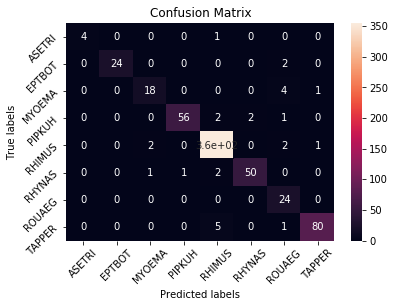

In [32]:
Y_pred = model.predict(X_test)
actual, predicted = generate_actual_predicted(Y_pred, X_test, Y_test)

##Confusion Matrix
from sklearn.metrics import confusion_matrix
actual_labeled = list()
predict_labeled = list()
for x,y in zip(actual,predicted):
    actual_labeled.append(getSpecies(x))
    predict_labeled.append(getSpecies(y))

labels = ['ASETRI','EPTBOT','MYOEMA','PIPKUH','RHIMUS','RHYNAS', 'ROUAEG', 'TAPPER']
cm=confusion_matrix(actual_labeled,predict_labeled,labels=labels)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);

In [33]:
## Test accuracy
from sklearn.metrics import accuracy_score
print('accuracy', accuracy_score(actual, predicted))


accuracy 0.9561815336463224


In [34]:
## Precision, Recall, F1, Support
from sklearn.metrics import classification_report
print(classification_report(actual_labeled, predict_labeled,labels=labels))

              precision    recall  f1-score   support

      ASETRI       1.00      0.80      0.89         5
      EPTBOT       1.00      0.92      0.96        26
      MYOEMA       0.86      0.78      0.82        23
      PIPKUH       0.98      0.92      0.95        61
      RHIMUS       0.97      0.99      0.98       360
      RHYNAS       0.96      0.93      0.94        54
      ROUAEG       0.71      1.00      0.83        24
      TAPPER       0.98      0.93      0.95        86

    accuracy                           0.96       639
   macro avg       0.93      0.91      0.91       639
weighted avg       0.96      0.96      0.96       639



In [35]:
##ROC AUC Scores
from sklearn.metrics import roc_auc_score
print('One-vs-One ROC AUC scores:')
print(roc_auc_score(actual, Y_pred, average='macro', multi_class='ovo'), '(macro)')
print(roc_auc_score(actual, Y_pred, average='weighted', multi_class='ovo'), '(weighted by prevalence)')


print()
print('One-vs-Rest ROC AUC scores:')
print(roc_auc_score(actual, Y_pred, average='macro', multi_class='ovr'), '(macro)')
print(roc_auc_score(actual, Y_pred, average='weighted', multi_class='ovr'), '(weighted by prevalence)')

One-vs-One ROC AUC scores:
0.9931850809425891 (macro)
0.9958855745700191 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.9962848971659861 (macro)
0.996929126605326 (weighted by prevalence)


/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


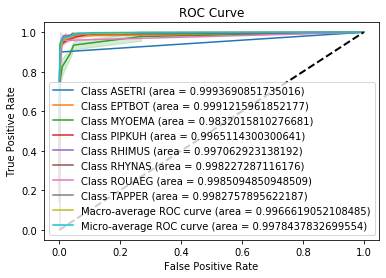

In [36]:
## ROC Curves
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import interp

### The following curves are generated s.t each point is a model from differing thresholds

### ROC Curves + AUC per class

_, axs = plt.subplots(ncols=1)
axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve')

fpr = [0] * 8
tpr = [0] * 8
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], Y_pred[:,i])
    auc_val = auc(fpr[i], tpr[i])
    sns.lineplot(x=fpr[i],y=tpr[i],ax=axs, label='Class '+ getSpecies(i) +' (area = ' + str(auc_val) + ')', legend='brief')

#### Micro/Macro ROC Curves + AUC over all classes

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(8)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(8):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 8

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)
fpr_micro, tpr_micro,_ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

sns.lineplot(x=fpr_macro,y=tpr_macro,ax=axs, label='Macro-average ROC curve (area = ' + str(roc_auc_macro) + ')', legend='brief')
sns.lineplot(x=fpr_micro,y=tpr_micro,ax=axs, label='Micro-average ROC curve (area = ' + str(roc_auc_micro) + ')', legend='brief')

## Diagonal line for comparison
plt.plot([0, 1], [0, 1], 'k--', lw=2)

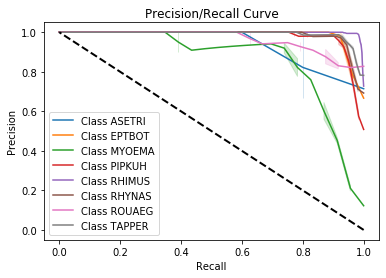

In [37]:
## Precision/Recall Curves per class
### The following curves are generated s.t each point is a model from differing thresholds
from sklearn.metrics import precision_recall_curve

_, axs = plt.subplots(ncols=1)
axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve')

prec = [0] * 8
rec = [0] * 8
for i in range(8):
    prec[i], rec[i], _ = precision_recall_curve(Y_test[:,i], Y_pred[:,i])
    sns.lineplot(x=rec[i],y=prec[i],ax=axs, label='Class '+ getSpecies(i), legend='brief')

# Diagonal line for comparison
plt.plot([1, 0], [0, 1], 'k--', lw=2)

<h2>K-Fold Training and Evaluation</h2>

In [ ]:
#Precision Mean and Standard Deviation
#Recall Mean and Standard Deviation
#F1 Measure Mean and Standard Deviation
#True Positive Rate. Mean and Standard Deviation
#False Negative Rate Mean and Standard Deviation
#Best/Worst ROC
#Best/Worst Precision/Recall
#Accuracy Mean and Standard Deviation

In [40]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

all_base_precision = list()
all_base_recall = list()
all_macro_precision = list()
all_macro_recall = list()
all_f1 = list()
all_macro_f1 = list()


all_tpr = list()
all_fpr = list()
all_precision = list()
all_recall = list()

all_accuracy = list()


n_split=5

y_all_labelled=[]
for i in range(len(Y_all)):
        y_all_labelled.append(np.argmax(Y_all[i]))
        
        
for train_index,test_index in StratifiedKFold(n_split).split(X_all,y_all_labelled):  
    # use the index to generate training an testing sets
    x_train,x_test=X_all[train_index],X_all[test_index]
    y_train,y_test=Y_all[train_index],Y_all[test_index]

    # create and fit the model
    cv_model=build_current_model()
    history = cv_model.fit(x_train, y_train,
              batch_size=8,
              epochs=30,
              validation_split=0.1,
              verbose=1)
    
    #generate predictions
    y_pred = cv_model.predict(x_test)
    actual, predicted = generate_actual_predicted(y_pred, x_test, y_test)
    
    #calc metrics
    curr_base_prec, curr_base_rec, curr_f1, _ = precision_recall_fscore_support(actual, predicted)
    curr_macro_prec = precision_score(actual, predicted,average='macro')
    curr_macro_rec = recall_score(actual, predicted,average='macro')
    curr_macro_f1 = f1_score(actual, predicted,average='macro')

    
    curr_fpr = [0] * 6
    curr_tpr = [0] * 6
    for i in range(6):
        curr_fpr[i], curr_tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        
    curr_prec = [0] * 6
    curr_rec = [0] * 6
    for i in range(6):
        curr_prec[i], curr_rec[i], _ = precision_recall_curve(y_test[:,i], y_pred[:,i])

        
    curr_accuracy = accuracy_score(actual, predicted)
    
    #add to lists
    all_base_precision.append(curr_base_prec)
    all_base_recall.append(curr_base_rec)
    all_macro_precision.append(curr_macro_prec)
    all_macro_recall.append(curr_macro_rec)
    
    all_f1.append(curr_f1)
    all_macro_f1.append(curr_macro_f1)
    
    all_accuracy.append(curr_accuracy)

    
    all_fpr.append(curr_fpr)
    all_tpr.append(curr_tpr)
    all_precision.append(curr_prec)
    all_recall.append(curr_rec)
    
    


Train on 2298 samples, validate on 256 samples
Epoch 1/30
2298/2298 [==============================] - 8s 3ms/sample - loss: 1.5579 - acc: 0.5387 - val_loss: 1.4838 - val_acc: 0.5273
Epoch 2/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.2953 - acc: 0.5988 - val_loss: 2.2378 - val_acc: 0.4883
Epoch 3/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.2664 - acc: 0.5940 - val_loss: 1.6647 - val_acc: 0.5430
Epoch 4/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.2501 - acc: 0.5966 - val_loss: 1.0872 - val_acc: 0.6211
Epoch 5/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.1490 - acc: 0.6310 - val_loss: 3.3356 - val_acc: 0.3398
Epoch 6/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.0781 - acc: 0.6379 - val_loss: 0.9744 - val_acc: 0.6719
Epoch 7/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.0434 - acc: 0.6462 - val_loss: 0.8969 - val_acc: 0.6758
E

2298/2298 [==============================] - 7s 3ms/sample - loss: 0.3660 - acc: 0.8734 - val_loss: 0.3721 - val_acc: 0.8750
Train on 2298 samples, validate on 256 samples
Epoch 1/30
2298/2298 [==============================] - 8s 4ms/sample - loss: 1.5636 - acc: 0.5326 - val_loss: 1.5490 - val_acc: 0.5273
Epoch 2/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.4157 - acc: 0.5635 - val_loss: 1.5104 - val_acc: 0.5625
Epoch 3/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.3128 - acc: 0.5870 - val_loss: 1.1837 - val_acc: 0.6094
Epoch 4/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.2333 - acc: 0.6036 - val_loss: 1.3813 - val_acc: 0.5469
Epoch 5/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.3811 - acc: 0.5670 - val_loss: 1.2811 - val_acc: 0.5820
Epoch 6/30
2298/2298 [==============================] - 7s 3ms/sample - loss: 1.2720 - acc: 0.5931 - val_loss: 1.1953 - val_acc: 0.5703
Epoch 7/30
2

2299/2299 [==============================] - 7s 3ms/sample - loss: 0.2647 - acc: 0.9147 - val_loss: 0.2158 - val_acc: 0.9375
Epoch 30/30
2299/2299 [==============================] - 7s 3ms/sample - loss: 0.2635 - acc: 0.9204 - val_loss: 0.2244 - val_acc: 0.9414
Train on 2299 samples, validate on 256 samples
Epoch 1/30
2299/2299 [==============================] - 8s 4ms/sample - loss: 1.5239 - acc: 0.5398 - val_loss: 1.6904 - val_acc: 0.4609
Epoch 2/30
2299/2299 [==============================] - 7s 3ms/sample - loss: 1.3610 - acc: 0.5916 - val_loss: 1.8673 - val_acc: 0.5508
Epoch 3/30
2299/2299 [==============================] - 7s 3ms/sample - loss: 1.2876 - acc: 0.6137 - val_loss: 1.6158 - val_acc: 0.5156
Epoch 4/30
2299/2299 [==============================] - 7s 3ms/sample - loss: 1.2545 - acc: 0.6033 - val_loss: 1.2435 - val_acc: 0.5742
Epoch 5/30
2299/2299 [==============================] - 7s 3ms/sample - loss: 1.1619 - acc: 0.6372 - val_loss: 1.0958 - val_acc: 0.5664
Epoch 6/30


In [41]:
print('precision mean by class', np.array(all_base_precision).mean(axis=0))
print('precision sdev by class', np.array(all_base_precision).std(axis=0))

print('macro precision mean', np.array(all_macro_precision).mean())
print('macro precision sdev', np.array(all_macro_precision).std())


print('recall mean', np.array(all_base_recall).mean(axis=0))
print('recall sdev', np.array(all_base_recall).std(axis=0))

print('macro recall mean', np.array(all_macro_recall).mean())
print('macro recall sdev', np.array(all_macro_recall).std())

print('f1 mean', np.array(all_f1).mean(axis=0))
print('f1 sdev', np.array(all_f1).std(axis=0))

print('macro f1 mean', np.array(all_macro_f1).mean())
print('macro f1 sdev', np.array(all_macro_f1).std())

print('accuracy mean', np.array(all_accuracy).mean())
print('accuracy sdev', np.array(all_accuracy).std())



precision mean by class [0.88571429 0.87153439 0.70958909 0.91343842 0.95338087 0.90168978
 0.72148583 0.90002852]
precision sdev by class [0.13997084 0.10559932 0.12171053 0.05004052 0.01881217 0.06727244
 0.07803762 0.04616472]
macro precision mean 0.8571076487231309
macro precision sdev 0.032282370039727254
recall mean [0.88       0.81680912 0.72055336 0.80562842 0.96830548 0.87804714
 0.867      0.87652531]
recall sdev [0.09797959 0.07835846 0.15345745 0.09313271 0.01008175 0.07571444
 0.08117471 0.06341585]
macro recall mean 0.8516086019772828
macro recall sdev 0.0523656364289099
f1 mean [0.86666667 0.83727858 0.71343269 0.85249527 0.96064379 0.88603225
 0.78363498 0.8872432 ]
f1 sdev [0.02721655 0.05856313 0.13667158 0.0598758  0.00983683 0.04755575
 0.05820894 0.04831847]
macro f1 mean 0.8484284283594183
macro f1 sdev 0.04079476230774175
accuracy mean 0.9132613164181886
accuracy sdev 0.024119104451238115


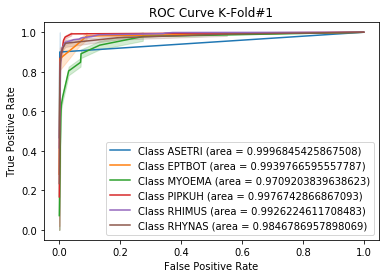

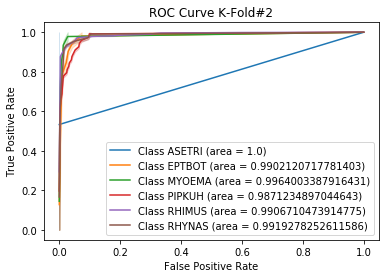

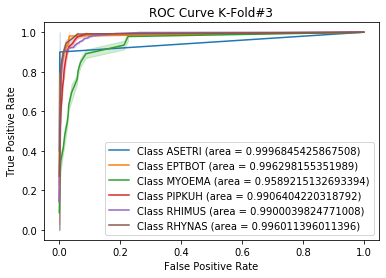

In [42]:
# Plot all K-Fold ROC curves
for i in range(3):
    _, axs = plt.subplots(ncols=1)
    axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve K-Fold#'+str(i+1))
    for j in range(6):
        auc_val = auc(all_fpr[i][j], all_tpr[i][j])
        sns.lineplot(x=all_fpr[i][j],y=all_tpr[i][j],ax=axs, label='Class '+ getSpecies(j) +' (area = ' + str(auc_val) + ')', legend='brief')
        

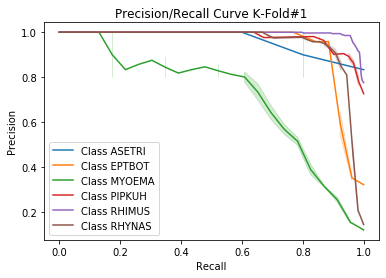

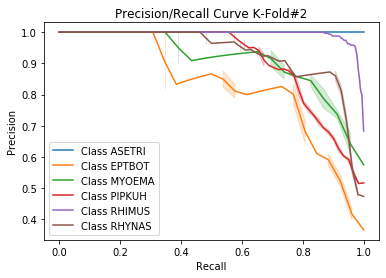

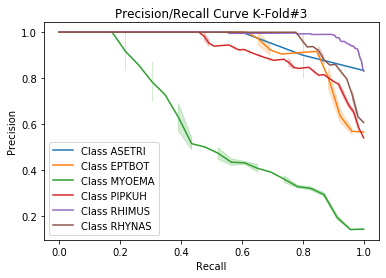

In [43]:
#Plot all K-Fold Precision/Recall curves
for i in range(3):
    _, axs = plt.subplots(ncols=1)
    axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve K-Fold#'+str(i+1))
    for j in range(6):
        sns.lineplot(x=all_recall[i][j],y=all_precision[i][j],ax=axs, label='Class '+ getSpecies(j), legend='brief')

<h2>Storing/Loading history and model to file</h2>

In [50]:
#Store History
hist_df = pd.DataFrame(history.history) 
hist_json_file = 'Model2V2-bats.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [53]:
#Load History 
history_info = pd.read_json('Model2V2-bats.json')

In [54]:
##Save Model
model.save('Model2V2-bats_trained.model') #Save the model

In [55]:
## Load Model
model = tf.keras.models.load_model('Model2V2-bats_trained.model') #Re load model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
